In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
directory= 'results/rl_all_strategy/cache_capacity_2500/2019_05_11_01_14'
eviction_strategy_dir = f'{directory}/eviction_strategy'
ttl_strategy_dir = f'{directory}/ttl_strategy'
caching_strategy_dir = f'{directory}/caching_strategy'

eviction_name = 'rl_eviction_strategy_'
ttl_name= 'rl_ttl_strategy_'
caching_name= 'rl_caching_strategy_'

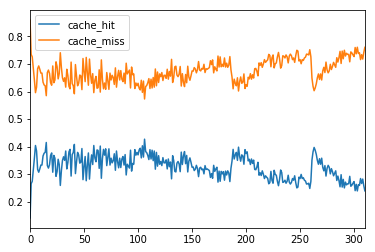

In [5]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', names=['timestamp', 'key', 'cache_hit', 'cache_miss'], 
                       usecols=['cache_hit', 'cache_miss']
                       )
stats_df[['cache_hit','cache_miss']] = stats_df[['cache_hit', 'cache_miss']].astype(int)
stats_df.groupby((stats_df.index // 1000)).mean().plot()

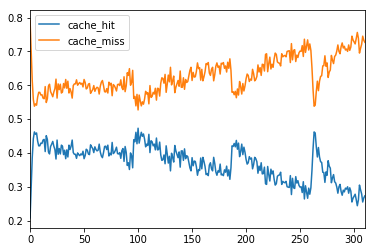

In [6]:
simple_dir = 'results/simple_strategy/cache_capacity_2500/2019_05_08_14_29'
stats_df = pd.read_csv(f'{simple_dir}/cache_hit_logger.log', names=['timestamp', 'key', 'cache_hit', 'cache_miss'], 
                       usecols=['cache_hit', 'cache_miss']
                       )
stats_df[['cache_hit','cache_miss']] = stats_df[['cache_hit', 'cache_miss']].astype(int)
stats_df.groupby((stats_df.index // 1000)).mean().plot()

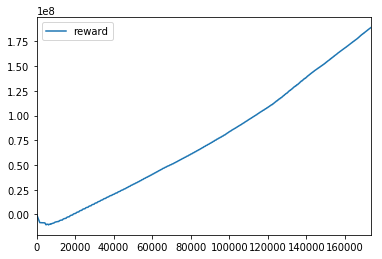

In [7]:

episode_reward_df = pd.read_csv(f'{ttl_strategy_dir}/{ttl_name}reward_logger.log', names=['timestamp', 'reward'], usecols=['reward'])
episode_reward_df.cumsum().plot()



Text(0.5, 0, 'Steps')

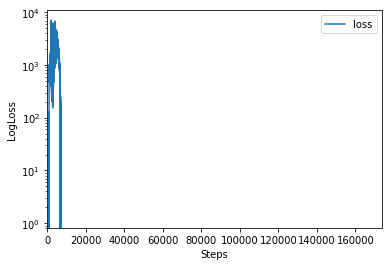

In [8]:
losses_df = pd.read_csv(f'{ttl_strategy_dir}/{ttl_name}loss_logger.log', names=['timestamp','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")

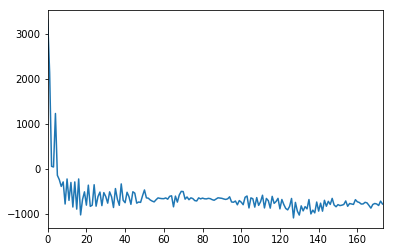

In [27]:
observations_df = pd.read_csv(f'{ttl_strategy_dir}/{ttl_name}ttl_logger.log', names=['timestamp','observation', 'key', 'ttl', 'real_ttl', 'hits'], usecols=['ttl', 'real_ttl'])
diff = observations_df['ttl'] - observations_df['real_ttl']
diff.groupby((diff.index // 1000)).mean().plot()

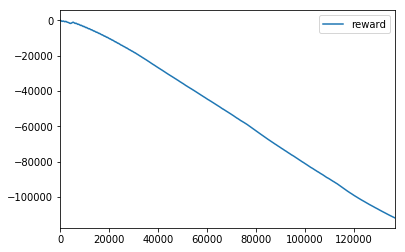

In [25]:
episode_reward_df = pd.read_csv(f'{eviction_strategy_dir}/{eviction_name}reward_logger.log', names=['timestamp', 'reward'], usecols=['reward'])
episode_reward_df.cumsum().plot()


Text(0.5, 0, 'Steps')

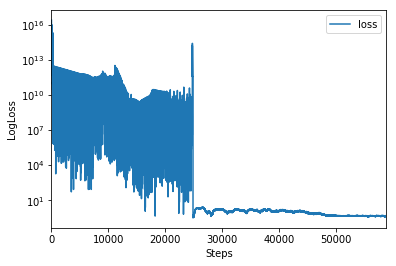

In [12]:

# losses_df = pd.read_csv(f'{eviction_strategy_dir}/{name}loss_logger.log', names=['loss'], parse_dates=True)
# 
# ax = losses_df.resample('5T').sum().plot(logy=True)
# ax.set_ylabel("Loss")
# ax.set_xlabel("Time")

losses_df = pd.read_csv(f'{eviction_strategy_dir}/{name}loss_logger.log', names=['timestamp','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")


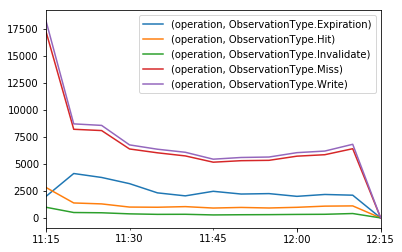

In [13]:
observations_df = pd.read_csv(f'{eviction_strategy_dir}/{name}observation_logger.log', names=['key', 'operation'], parse_dates=True)
ax = observations_df.groupby('operation').resample('5T').count().drop(['key'], axis=1).unstack(0).plot()
ax.legend(loc='upper right')

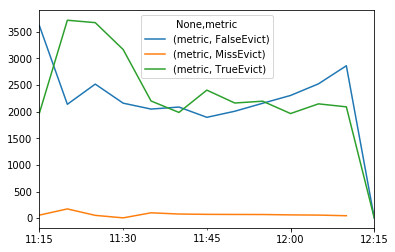

In [14]:
performance_df =  pd.read_csv(f'{eviction_strategy_dir}/{name}performance_logger.log', names=['metric'], parse_dates=True)
performance_df.groupby('metric').resample('5T').count().unstack(0).plot()

In [15]:
episode_reward_df.count()

reward    58850
dtype: int64

In [10]:

episode_reward_df.max()

reward    1
dtype: int64